# **Sentiment Analysis of Instagram App Reviews**


**Step1:**
Importing necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Step2:-**
Importing dataset

In [ ]:
df = pd.read_csv('/content/instagram.csv') # taken for Kaggle

df.head()

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,08-07-23 14:18
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,19-07-23 20:52
2,Google Play,"For a brand new app, it's very well optimized....",3,06-07-23 23:03
3,Google Play,"Great app with a lot of potential! However, th...",3,10-07-23 0:53
4,Google Play,"The app is good, but it needs a lot of functio...",3,06-07-23 16:57


**Step3:-**
**Shape of dataset**

In [ ]:
rows, cols = df.shape
print(f"Number of rows = {rows} \nNumber of columns = {cols}")

Number of rows = 32910 
Number of columns = 4


**Step4:-**
**Identify and Remove Duplicate data**

In [ ]:
if df.duplicated().sum() == 0:
  print("There is no duplicate data.")

else:
  print(f"There are {df.duplicated().sum()} duplicate values found and they are dropped!")
  df = df.drop_duplicates()

There are 66 duplicate values found and they are dropped!


**Step5:-**
**Retrieving Review Values**

In [ ]:
df['review_description'][0]

"Meh. Not the greatest experience on a Chromebook. Seems to be customized for phones only. Opens in a little screen that you can't expand or resize - for reasons that are a complete mystery to me. Judging from the fact that every other app I know of is resizeable, this seems like it was a conscious choice by the developers . Why you'd do something like this is beyond understanding and suggests a control freak approach. Not a great way to make a first impression."

**Step6:-**
**Data Description**

In [ ]:
df.describe().transpose() # Use 'df' instead of 'sept'

,count,mean,std,min,25%,50%,75%,max
rating,32844.0,3.395445,1.751759,1.0,1.0,4.0,5.0,5.0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 32844 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32844 non-null  object
 1   review_description  32844 non-null  object
 2   rating              32844 non-null  int64 
 3   review_date         32844 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


Step7:-
**Identify Null values**

In [ ]:
df.isna().sum()

source                0
review_description    0
rating                0
review_date           0
dtype: int64

**Step8:-**
**Function to classify Sentiment Score**

In [ ]:
def analyze(x):
        # Positive > 0.5 or Positive = 0.5
        if(x>=0.5):
            return "Positive"
        # Negative > -0.5 or Negative = -0.5
        elif x<=-0.5:
            return "Negative"
        # -0.5 < Neutral < 0.5
        else:
            return "Neutral"

**Step9:-**
**Function to calculate sentiment score using TextBlob**

In [ ]:
def score(x):
        blob = TextBlob(x)
        return blob.sentiment.polarity

In [ ]:
df['score']=df['review_description'].apply(score)
df['analysis']=df['score'].apply(analyze) # Change 'septpt' to 'sept'

In [ ]:
df.head()

,source,review_description,rating,review_date,score,analysis
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,08-07-23 14:18,0.092187,Neutral
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,19-07-23 20:52,0.282205,Neutral
2,Google Play,"For a brand new app, it's very well optimized....",3,06-07-23 23:03,0.153438,Neutral
3,Google Play,"Great app with a lot of potential! However, th...",3,10-07-23 0:53,0.128571,Neutral
4,Google Play,"The app is good, but it needs a lot of functio...",3,06-07-23 16:57,0.313333,Neutral


In [ ]:
print(df.columns)

Index(['source', 'review_description', 'rating', 'review_date', 'score',
       'analysis'],
      dtype='object')


In [ ]:
df['analysis'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [ ]:
print(df.columns)


Index(['source', 'review_description', 'rating', 'review_date', 'score',
       'analysis'],
      dtype='object')


In [ ]:
df["rating"].value_counts()

rating
5    15495
1     9725
4     3244
3     2584
2     1796
Name: count, dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,32844.0,3.395445,1.751759,1.0,1.0,4.000000,5.0,5.0
score,32844.0,0.208894,0.390372,-1.0,0.0,0.081318,0.5,1.0


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
source,32844,2,Google Play,30209
review_description,32844,26706,Good,776
review_date,32844,11749,06-07-23 16:43,22
analysis,32844,3,Neutral,21766


**Step10:-Define a rating function to classify rating.**

In [ ]:
def rating(x):
    # Convert x to a numeric format (assuming x is in string format)
    x = float(x)

    if x >= 8 and x <= 10:
        return 'Positive'
    elif x >= 4 and x <= 7:
        return 'Neutral'
    else:
        return 'Negative'

In [ ]:
df['rating_analysis']=df['rating'].apply(rating)

In [ ]:
df['final_rating'] = 'Positive'

In [ ]:
conditions = [
    (df['analysis'] == 'Positive') & (df['rating_analysis'] == 'Positive'),
    ((df['analysis'] == 'Positive') & (df['rating_analysis'] == 'Neutral')) | ((df['analysis'] == 'Neutral') & (df['rating_analysis'] == 'Positive')),
    ((df['analysis'] == 'Negative') & (df['rating_analysis'] == 'Neutral')) | ((df['analysis'] == 'Neutral') & (df['rating_analysis'] == 'Negative')),
    (df['analysis'] == 'Neutral') & (df['rating_analysis'] == 'Neutral'),
    (df['analysis'] == 'Negative') & (df['rating_analysis'] == 'Negative')
]
choices = ['Positive', 'Positive', 'Neutral', 'Neutral', 'Negative']
df['final_rating'] = np.select(conditions, choices, default='Neutral')


print(df[['review_description', 'analysis', 'rating_analysis', 'final_rating']])

                                      review_description  analysis  \
0      Meh. Not the greatest experience on a Chromebo...   Neutral   
1      Pretty good for a first launch!! Its easy to u...   Neutral   
2      For a brand new app, it's very well optimized....   Neutral   
3      Great app with a lot of potential! However, th...   Neutral   
4      The app is good, but it needs a lot of functio...   Neutral   
...                                                  ...       ...   
32905  This killed my dog. Mark zuckerburg strangled ...   Neutral   
32906              Add Search and hashtag like Twitter !   Neutral   
32907                                        bad twister  Negative   
32908                       Yet another trash from Meta.   Neutral   
32909  Nothing special this app is just a copy of twi...   Neutral   

      rating_analysis final_rating  
0            Negative      Neutral  
1            Negative      Neutral  
2            Negative      Neutral  
3          

In [ ]:
df.head()

,source,review_description,rating,review_date,score,analysis,rating_analysis,final_rating
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,08-07-23 14:18,0.092187,Neutral,Negative,Neutral
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,19-07-23 20:52,0.282205,Neutral,Negative,Neutral
2,Google Play,"For a brand new app, it's very well optimized....",3,06-07-23 23:03,0.153438,Neutral,Negative,Neutral
3,Google Play,"Great app with a lot of potential! However, th...",3,10-07-23 0:53,0.128571,Neutral,Negative,Neutral
4,Google Play,"The app is good, but it needs a lot of functio...",3,06-07-23 16:57,0.313333,Neutral,Negative,Neutral


In [ ]:
df.tail()

,source,review_description,rating,review_date,score,analysis,rating_analysis,final_rating
32905,App Store,This killed my dog. Mark zuckerburg strangled ...,1,06-07-23 1:23,-0.200000,Neutral,Negative,Neutral
32906,App Store,Add Search and hashtag like Twitter !,1,19-07-23 8:01,0.000000,Neutral,Negative,Neutral
32907,App Store,bad twister,1,17-07-23 6:39,-0.700000,Negative,Negative,Negative
32908,App Store,Yet another trash from Meta.,1,07-07-23 17:47,0.000000,Neutral,Negative,Neutral
32909,App Store,Nothing special this app is just a copy of twi...,1,07-07-23 7:01,0.357143,Neutral,Negative,Neutral


In [ ]:
df['final_rating'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

<Axes: xlabel='final_rating', ylabel='count'>

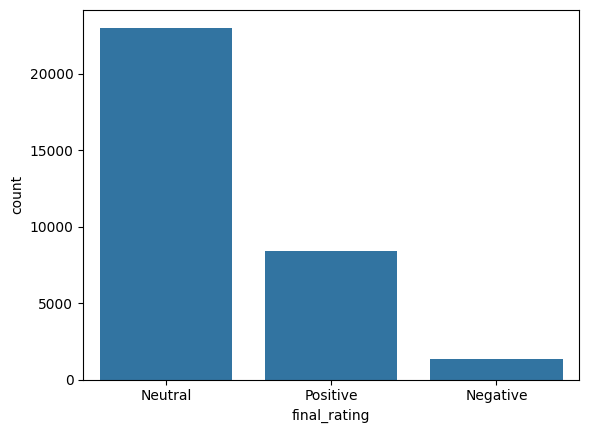

In [ ]:
sns.countplot(x='final_rating',data =df)

According to analysis, as per public reviews, most of their responses on this app is NEUTRAL.

# Step11:-
**Time Phase**

In [ ]:
# Assuming 'review_date' is in string format
df['review_date'] = pd.to_datetime(df['review_date'], format='%d-%m-%y %H:%M')

def categorize_day_phase(date):
    day = date.day
    if 1 <= day <= 5:
        return 'phase 1'
    elif 6 <= day <= 10:
        return 'phase 2'
    elif 11 <= day <= 15:
        return 'phase 3'
    elif 16 <= day <= 20:
        return 'phase 4'
    elif 21 <= day <= 25:
        return 'phase 5'
    elif 26 <= day <= 31:
        return 'phase 6'


df['phase'] = df['review_date'].apply(categorize_day_phase)

In [ ]:
# Sort the DataFrame based on 'phase'
df.sort_values(by='phase', inplace=True)

In [ ]:

def calculate_phase_rating(group):
    max_type = group['final_rating'].mode().iloc[0]
    total_count = group['final_rating'].count()
    return pd.Series({'type': max_type, 'count': total_count})


phase_ratings = df.groupby('phase').apply(calculate_phase_rating)


phase_ratings = phase_ratings.reset_index()


print(phase_ratings)

     phase     type  count
0  phase 1  Neutral    362
1  phase 2  Neutral  25650
2  phase 3  Neutral   3771
3  phase 4  Neutral   1628
4  phase 5  Neutral   1433


In [ ]:

sentiment_percentage_df = pd.DataFrame(columns=['phase', 'Neutral', 'Positive', 'Negative'])


for phase in df['phase'].unique():

    phase_df = df[df['phase'] == phase]


    total_reviews = len(phase_df)


    neutral_percentage = (phase_df['final_rating'] == 'Neutral').sum() / total_reviews * 100
    positive_percentage = (phase_df['final_rating'] == 'Positive').sum() / total_reviews * 100
    negative_percentage = (phase_df['final_rating'] == 'Negative').sum() / total_reviews * 100


    temp_df = pd.DataFrame({
        'phase': [phase],
        'Neutral': [neutral_percentage],
        'Positive': [positive_percentage],
        'Negative': [negative_percentage]
    })


    sentiment_percentage_df = pd.concat([sentiment_percentage_df, temp_df], ignore_index=True)

print(sentiment_percentage_df)

     phase    Neutral   Positive   Negative
0  phase 1  70.165746  26.795580   3.038674
1  phase 2  69.485380  27.348928   3.165692
2  phase 3  71.519491  22.275259   6.205251
3  phase 4  74.078624  16.277641   9.643735
4  phase 5  73.621773  15.631542  10.746685


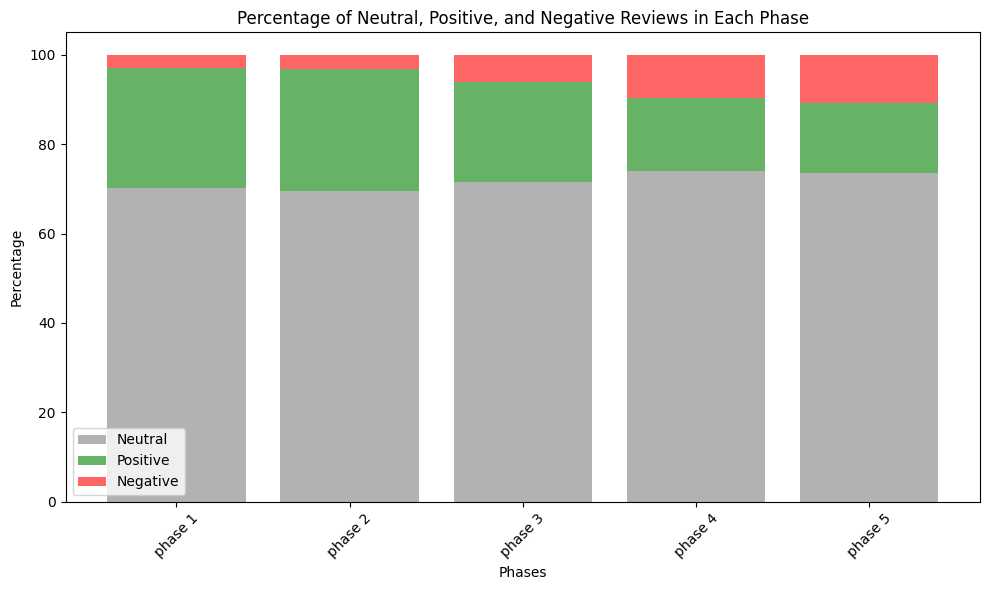

In [ ]:
import matplotlib.pyplot as plt

sentiment_percentage_df = sentiment_percentage_df.sort_values(by='phase')
x = sentiment_percentage_df['phase']
neutral_percentages = sentiment_percentage_df['Neutral']
positive_percentages = sentiment_percentage_df['Positive']
negative_percentages = sentiment_percentage_df['Negative']


plt.figure(figsize=(10, 6))
plt.bar(x, neutral_percentages, label='Neutral', color='grey', alpha=0.6)
plt.bar(x, positive_percentages, label='Positive', color='green', alpha=0.6, bottom=neutral_percentages)
plt.bar(x, negative_percentages, label='Negative', color='red', alpha=0.6, bottom=neutral_percentages + positive_percentages)


plt.xlabel('Phases')
plt.ylabel('Percentage')
plt.title('Percentage of Neutral, Positive, and Negative Reviews in Each Phase')


plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
pip install --upgrade statsmodels

In [ ]:
!pip install statsmodels

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

data = {
    'phase': ['phase 1', 'phase 2', 'phase 3', 'phase 4', 'phase 5'],
    'Neutral': [70.165746, 69.485380, 71.519491, 74.078624, 73.621773],
    'Positive': [26.795580, 27.348928, 22.275259, 16.277641, 15.631542],
    'Negative': [3.038674, 3.165692, 6.205251, 9.643735, 10.746685]
}

df = pd.DataFrame(data)

df.set_index('phase', inplace=True)


def forecast_arima(data, column_name, steps):
    model = ARIMA(data[column_name], order=(1, 1, 1))
    model_fit = model.fit()
    forecasted = model_fit.forecast(steps=steps)
    return forecasted

initial_phases = 5
forecast_steps = 10
forecast_df = pd.DataFrame(columns=['Phase', 'Neutral', 'Positive', 'Negative'])


for column_name in ['Neutral', 'Positive', 'Negative']:
    forecast = forecast_arima(df, column_name, forecast_steps)
    forecast_df[column_name] = forecast


forecast_df['Phase'] = [f'phase {i}' for i in range(initial_phases + 1, initial_phases + forecast_steps + 1)]



summary_df = pd.DataFrame({
    'Month': ['August'],
    'Neutral': [forecast_df['Neutral'].mean()],
    'Positive': [forecast_df['Positive'].mean()],
    'Negative': [forecast_df['Negative'].mean()]
})

average_neutral_september = df['Neutral'].loc['phase 10':'phase 25'].mean()
average_positive_september = df['Positive'].loc['phase 10':'phase 25'].mean()
average_negative_september = df['Negative'].loc['phase 10':'phase 25'].mean()
summary_df.loc[1] = ['September', average_neutral_september, average_positive_september, average_negative_september]

print(summary_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. for

       Month    Neutral   Positive   Negative
0     August  72.968349  16.890528  10.706148
1  September  69.485380  27.348928   3.165692


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


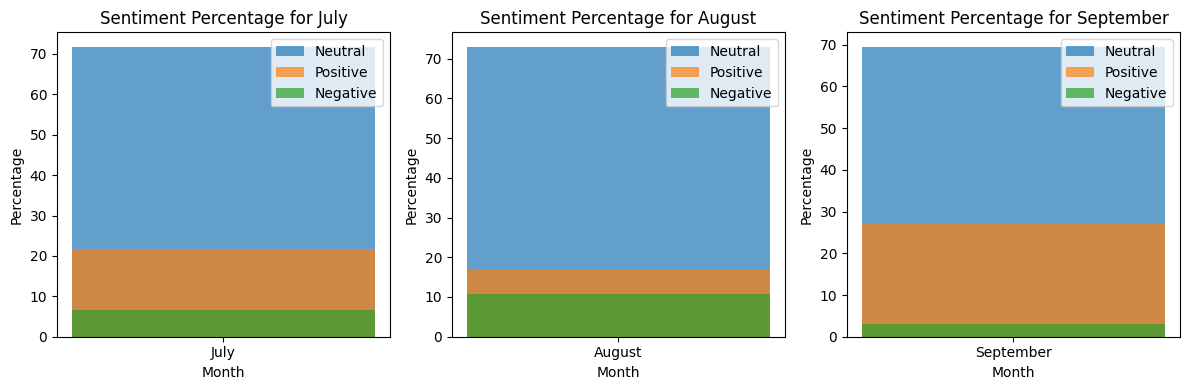

In [ ]:
months = summary_df['Month']
neutral_percentages = summary_df['Neutral']
positive_percentages = summary_df['Positive']
negative_percentages = summary_df['Negative']


months = ['July'] + months.tolist()
neutral_percentages = [71.7742028] + neutral_percentages.tolist()
positive_percentages = [21.6657898] + positive_percentages.tolist()
negative_percentages = [6.5600074] + negative_percentages.tolist()


plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.bar(months[0], neutral_percentages[0], label='Neutral', alpha=0.7)
plt.bar(months[0], positive_percentages[0], label='Positive', alpha=0.7)
plt.bar(months[0], negative_percentages[0], label='Negative', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.title('Sentiment Percentage for July')
plt.legend()

plt.subplot(1, 3, 2)
plt.bar(months[1], neutral_percentages[1], label='Neutral', alpha=0.7)
plt.bar(months[1], positive_percentages[1], label='Positive', alpha=0.7)
plt.bar(months[1], negative_percentages[1], label='Negative', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.title('Sentiment Percentage for August')
plt.legend()

plt.subplot(1, 3, 3)

september_data = summary_df[summary_df['Month'] == 'September']
september_neutral = september_data['Neutral']
september_positive = september_data['Positive']
september_negative = september_data['Negative']
plt.bar(months[2], september_neutral.values[0], label='Neutral', alpha=0.7)
plt.bar(months[2], september_positive.values[0], label='Positive', alpha=0.7)
plt.bar(months[2], september_negative.values[0], label='Negative', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.title('Sentiment Percentage for September')
plt.legend()

plt.tight_layout()
plt.show()

# ** write a code to perform sentiment analysis on the reviews from the provided CSV file using nltk. We'll divide the reviews into positive, negative, and neutral categories based on their review_description.**

In [ ]:
!pip install nltk pandas

In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

Interpretation of the Compound Score:
 Positive Sentiment: A compound score >= 0.05.
 Neutral Sentiment: A compound score between -0.05 and 0.05.
 Negative Sentiment: A compound score <= -0.05.

The compound score in the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool is computed through the following steps:

Valence Score Assignment: Each word in the text is assigned a sentiment score from the VADER lexicon. These scores can be positive, negative, or neutral.

Text Processing: The text is preprocessed to identify negations, booster words (words that increase or decrease the intensity of the sentiment), and other context-aware adjustments. For example, "not good" would have a different sentiment score than "good".

Valence Adjustment: The sentiment scores of words are adjusted based on their context. For instance, negations like "not" in "not good" would change the valence score of "good" to a negative score.

Sum of Scores: The adjusted sentiment scores of all words in the text are summed to get a total sentiment score for the text.

Normalization: The sum of the sentiment scores is normalized to ensure the compound score lies between -1 and +1. This normalization is done using a function
𝑥
/
𝑥
2
+
𝛼
x/
x
2
 +α
​
 , where
𝑥
x is the sum of the sentiment scores and
𝛼
α is a constant value (typically 15).

Compound Score Formula
The formal formula for the compound score is:

compound
=
𝑐
𝑐
2
+
15
compound=

2
 +15
​


​


where
𝑐
c is the sum of the valence scores of the words in the text.

Example Calculation
Assume we have a simple sentence: "This is absolutely wonderful!"

Valence Scores:

"absolutely" (booster, increases intensity)
"wonderful" (+4.1)
Adjust Scores Based on Context:

"absolutely wonderful" might be adjusted to a higher positive score due to the intensifier "absolutely".
Sum of Scores:

Let's assume after adjustment, the total score
𝑐
c becomes 4.5.
Normalization:

compound
=
4.5
4.
5
2
+
15
=
4.5
20.25
+
15
=
4.5
35.25
=
4.5
5.94
≈
0.757
compound=
4.5
2
 +15
​

4.5
​
 =
20.25+15
​

4.5
​
 =
35.25
​

4.5
​
 =
5.94
4.5
​
 ≈0.757
The compound score of approximately 0.757 indicates a strong positive sentiment.

This normalized score ensures that the compound score ranges between -1 (most extreme negative) and +1 (most extreme positive), providing a standardized measure of overall sentiment.

In [ ]:
!pip install nltk pandas matplotlib seaborn


**Plotting the Results**

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Positive reviews: 16888
Negative reviews: 5449
Neutral reviews: 10573


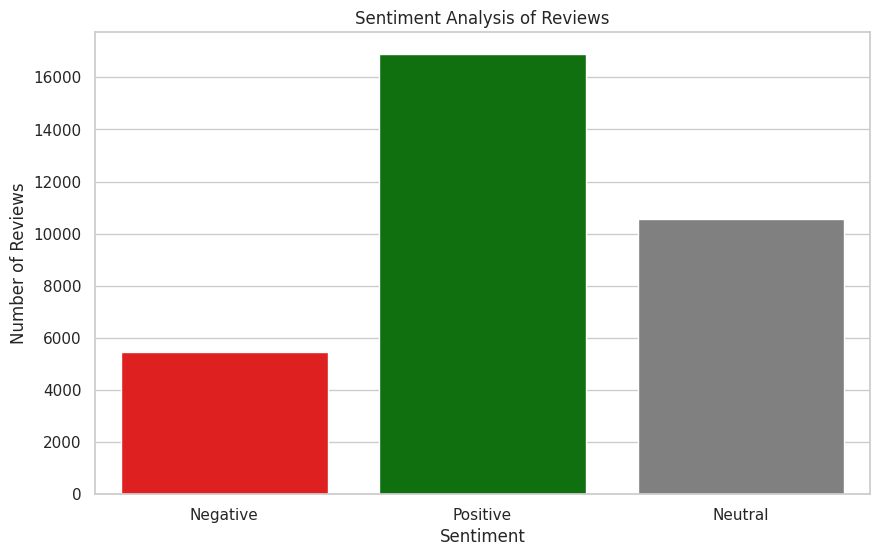

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

# Load the CSV file
file_path = 'instagram.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Ensure the column with reviews is correctly identified (assuming 'review_description')
if 'review_description' in df.columns:
    # Function to categorize the sentiment
    def categorize_sentiment(text):
        scores = sid.polarity_scores(text)
        compound_score = scores['compound']
        if compound_score >= 0.05:
            return 'Positive'
        elif compound_score <= -0.05:
            return 'Negative'
        else:
            return 'Neutral'

    # Apply the sentiment analysis
    df['Sentiment'] = df['review_description'].apply(categorize_sentiment)

    # Separate the reviews into categories
    positive_reviews = df[df['Sentiment'] == 'Positive']
    negative_reviews = df[df['Sentiment'] == 'Negative']
    neutral_reviews = df[df['Sentiment'] == 'Neutral']

    # Display the results
    print(f"Positive reviews: {len(positive_reviews)}")
    print(f"Negative reviews: {len(negative_reviews)}")
    print(f"Neutral reviews: {len(neutral_reviews)}")

    # Optionally, save the results to a new CSV file
    df.to_csv('sentiment_analysis_results.csv', index=False)

    # Plot the results
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Define a color palette
    palette = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'gray'}

    sns.countplot(x='Sentiment', data=df, palette=palette)
    plt.title('Sentiment Analysis of Reviews')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Reviews')

    plt.show()
else:
    print("Column 'review_description' not found in the CSV file.")
